In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("C:/Users/admin/Desktop/CodSoft Internship 2024/fraudTrain.csv")
df_test = pd.read_csv("C:/Users/admin/Desktop/CodSoft Internship 2024/fraudTest.csv")

In [3]:
print(df_train.shape[0])
print(df_test.shape[0])

1048575
555719


In [4]:
df = pd.concat([df_train, df_test])
df.shape[0]

1604294

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<Axes: xlabel='is_fraud'>

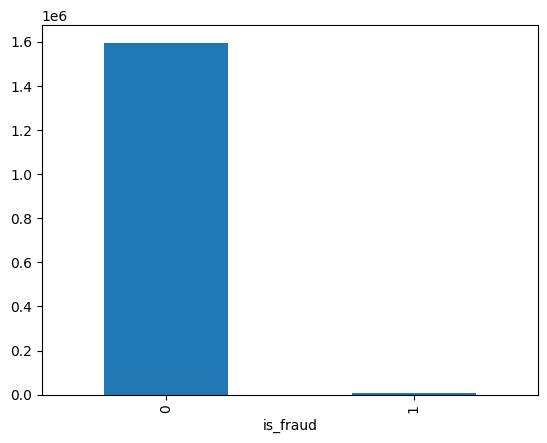

In [6]:
df.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [7]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape[0])
print(not_fraud.shape[0])

8151
1596143


In [8]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

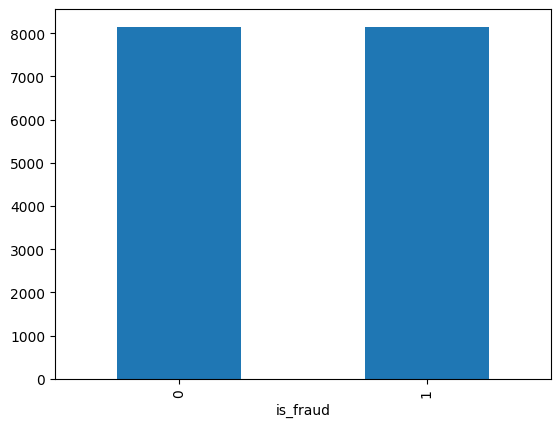

In [9]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16302 entries, 2449 to 789236
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16302 non-null  int64  
 1   trans_date_trans_time  16302 non-null  object 
 2   cc_num                 16302 non-null  float64
 3   merchant               16302 non-null  object 
 4   category               16302 non-null  object 
 5   amt                    16302 non-null  float64
 6   first                  16302 non-null  object 
 7   last                   16302 non-null  object 
 8   gender                 16302 non-null  object 
 9   street                 16302 non-null  object 
 10  city                   16302 non-null  object 
 11  state                  16302 non-null  object 
 12  zip                    16302 non-null  int64  
 13  lat                    16302 non-null  float64
 14  long                   16302 non-null  float64
 15  cit

In [11]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]

# Dropping the columns
df_new.drop(columns=useless_cols, inplace=True)

In [12]:
df_new.isna().sum().sum()

0

In [13]:
df_new.duplicated().sum()

5

In [14]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,9/15/1988,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,10/28/1960,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,10/28/1960,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,9/15/1988,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,10/28/1960,1
...,...,...,...,...,...,...,...,...,...
261316,health_fitness,40.76,Newhall,CA,34.3795,-118.5230,34882,4/25/1971,0
91333,shopping_pos,4.29,Cleveland,AL,33.9778,-86.5598,3996,6/14/1977,0
180744,grocery_pos,63.33,Milford,OH,39.1657,-84.2330,31394,11/12/1996,0
242218,personal_care,102.65,Lawn,PA,40.2236,-76.5380,213,2/15/1972,0


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16302 entries, 2449 to 789236
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  16302 non-null  object 
 1   amt       16302 non-null  float64
 2   city      16302 non-null  object 
 3   state     16302 non-null  object 
 4   lat       16302 non-null  float64
 5   long      16302 non-null  float64
 6   city_pop  16302 non-null  int64  
 7   dob       16302 non-null  object 
 8   is_fraud  16302 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.2+ MB


In [16]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [17]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
261316,health_fitness,40.76,Newhall,CA,34.3795,-118.5230,34882,53,0
91333,shopping_pos,4.29,Cleveland,AL,33.9778,-86.5598,3996,47,0
180744,grocery_pos,63.33,Milford,OH,39.1657,-84.2330,31394,28,0
242218,personal_care,102.65,Lawn,PA,40.2236,-76.5380,213,52,0


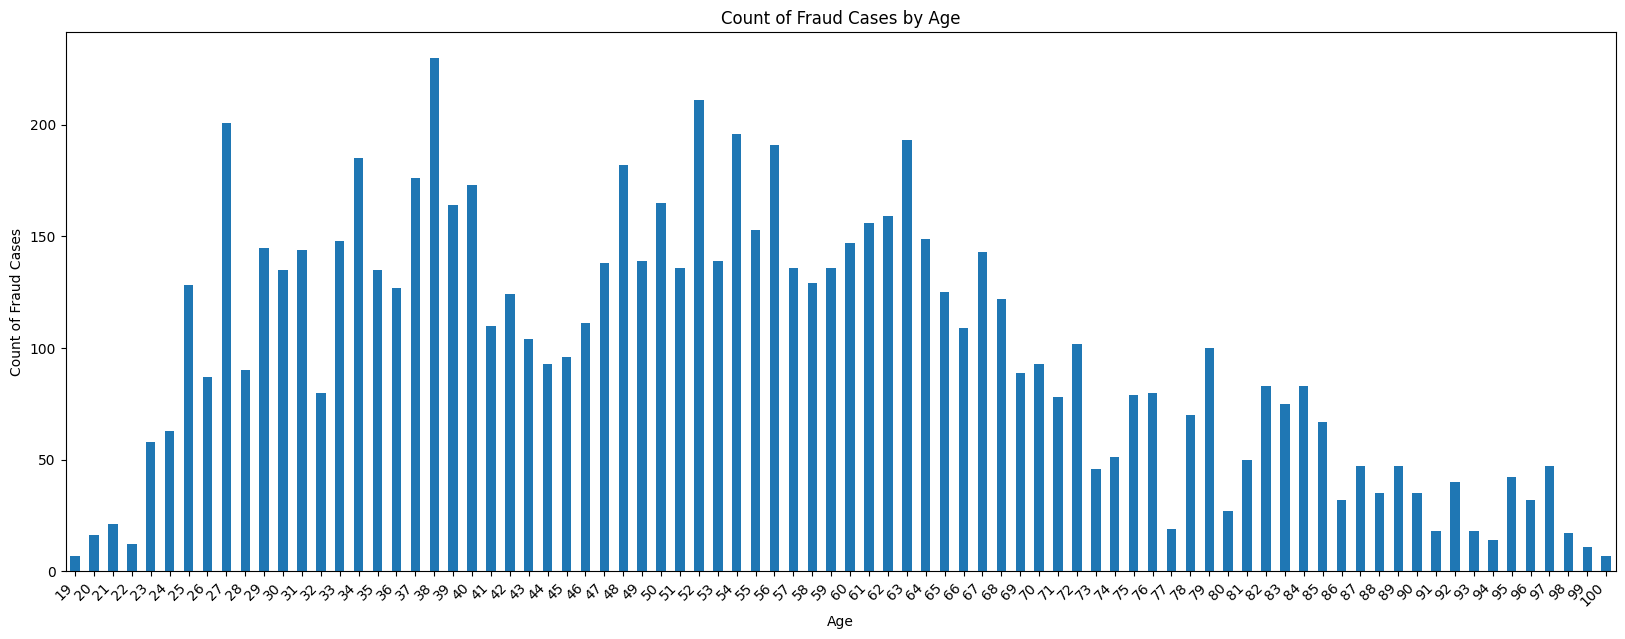

In [18]:
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [20]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df_new[col] = encoder.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,161,27,35.9946,-81.7266,885,36,1
2472,2,11.52,718,43,29.4400,-98.4590,1595797,64,1
2523,4,276.31,718,43,29.4400,-98.4590,1595797,64,1
2546,2,7.03,161,27,35.9946,-81.7266,885,36,1
2553,4,275.73,718,43,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...
261316,5,40.76,563,4,34.3795,-118.5230,34882,53,0
91333,12,4.29,150,1,33.9778,-86.5598,3996,47,0
180744,4,63.33,504,35,39.1657,-84.2330,31394,28,0
242218,10,102.65,430,38,40.2236,-76.5380,213,52,0


In [22]:
columns = df_new.columns.tolist() 
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,-0.711272,-0.048656,-1.086426,0.035911,-0.519903,0.603374,-0.300181,-0.888200,1
2472,-1.228266,-0.745867,1.071113,1.160778,-1.806172,-0.603139,5.185259,0.672096,1
2523,-0.711272,-0.060943,1.071113,1.160778,-1.806172,-0.603139,5.185259,0.672096,1
2546,-1.228266,-0.757481,-1.086426,0.035911,-0.519903,0.603374,-0.300181,-0.888200,1
2553,-0.711272,-0.062443,1.071113,1.160778,-1.806172,-0.603139,5.185259,0.672096,1
...,...,...,...,...,...,...,...,...,...
261316,-0.452775,-0.670233,0.470720,-1.581085,-0.836849,-2.049882,-0.183254,0.059123,0
91333,1.356706,-0.764569,-1.129035,-1.791998,-0.915678,0.254869,-0.289482,-0.275227,0
180744,-0.711272,-0.611852,0.242184,0.598345,0.102391,0.422646,-0.195251,-1.333999,0
242218,0.839712,-0.510144,-0.044455,0.809257,0.309992,0.977505,-0.302493,0.003398,0


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [26]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [27]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:36:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.852499,0.931527,0.760442,0.837335
Decision Tree,0.952469,0.952118,0.952703,0.952410
Random Forest,0.951549,0.961683,0.940418,0.950932
Gradient Boosting,0.938362,0.942343,0.933661,0.937982
XGBoost,0.965961,0.959419,0.972973,0.966148
SVC,0.865685,0.964844,0.758600,0.849381
KNN,0.825207,0.864325,0.770885,0.814935
Naive Bayes,0.779515,0.960486,0.582310,0.725048
AdaBoost,0.906777,0.911180,0.901106,0.906115


In [28]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgb_model.fit(X_train, y_train)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [11:36:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1566   67]
 [  44 1584]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1633
           1       0.96      0.97      0.97      1628

    accuracy                           0.97      3261
   macro avg       0.97      0.97      0.97      3261
weighted avg       0.97      0.97      0.97      3261



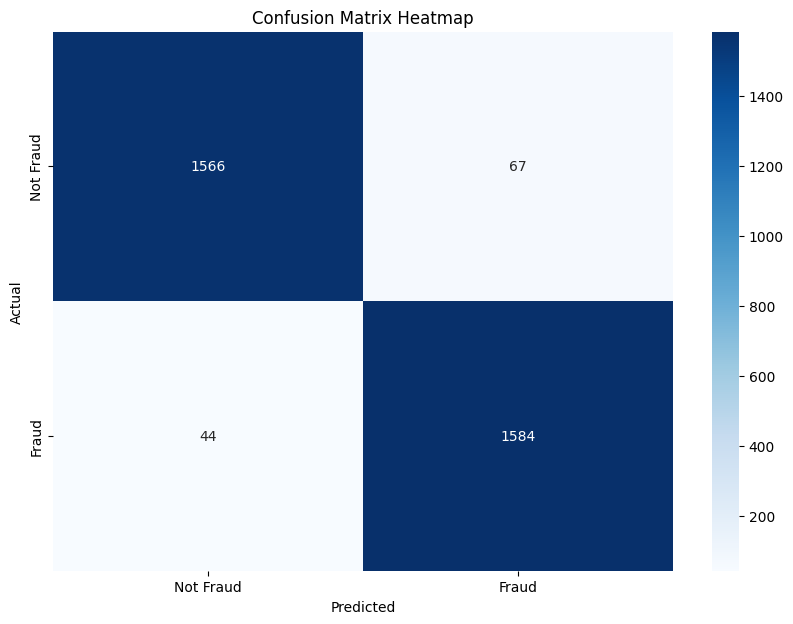

In [30]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
# Save the model to a file
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']